In [1]:
%cd "C://Users//TRETEC//Documents//MVA//S1//[IPGM] Introduction to probabilistic graphical models//Projet//independent_component_analysis"
from mva_independent_component_analysis.utils.preprocessing import centering_and_whitening
from mva_independent_component_analysis.fast_ica.fastica_numpy import fast_ica
from mva_independent_component_analysis.fast_ica.fastica import fast_ica as fast_ica_2
from mva_independent_component_analysis.utils.mix_sources import mix_sources
import jax
%cd experiments/exp3_images

C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis
C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\experiments\exp3_images


c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Importing an image : 

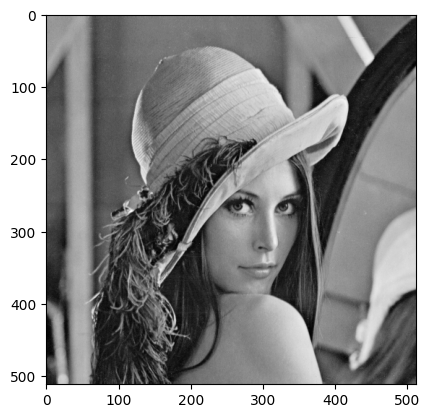

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img = plt.imread('lena.png')
img = rgb2gray(img)
plt.imshow(img, cmap='gray')

Creating a noise image :

Text(0.5, 1.0, 'image')

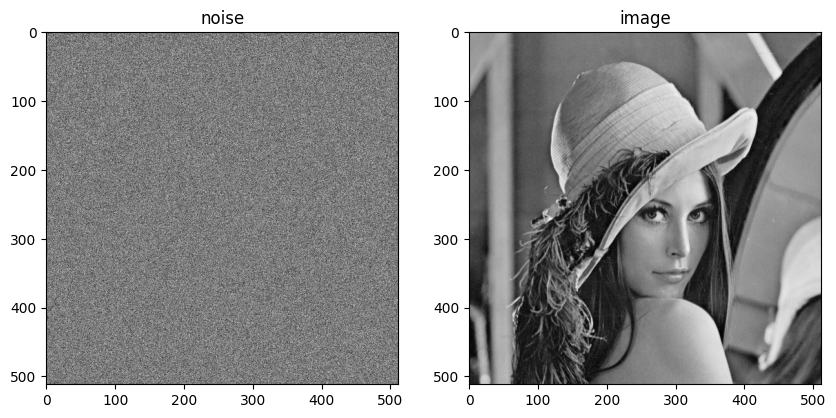

In [3]:
#Sources : image and noise
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
noise = np.random.standard_normal(img.shape)
plt.imshow(noise,cmap='gray')
plt.title('noise')
plt.subplot(1,2,2)
plt.imshow(img, cmap='gray')
plt.title('image')

In [4]:
noise_flat=noise.ravel()
img_flat=img.ravel()

Mixing them :

In [5]:
S=[noise_flat,img_flat]
S, X, Xw = mix_sources(S, False)

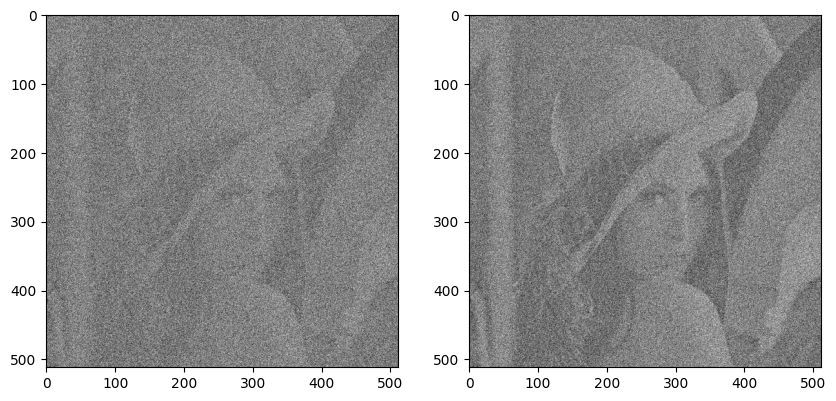

In [6]:
# Noisy images 
plt.figure(figsize=(10,5))
for i,noisy_ in enumerate(X):
    plt.subplot(1,2,i+1)
    noisy_=noisy_.reshape(img.shape)
    plt.imshow(noisy_, cmap='gray')

In [15]:
plt.imsave('noisy_lena.png',X[0].reshape(img.shape),cmap='gray')

Apply ICA : 

In [8]:
W, _ = fast_ica(Xw, 1, 1e-8, 5000) #Nour's method.

component 0
iteration : 0 : distance 0.01088804006576538
iteration : 1 : distance 1.4901161193847656e-06
iteration : 2 : distance 0.0
component 1
iteration : 0 : distance 0.757035106420517
iteration : 1 : distance 1.1920928955078125e-07
iteration : 2 : distance 1.1920928955078125e-07


In [9]:
unMixed = np.dot(W,Xw)


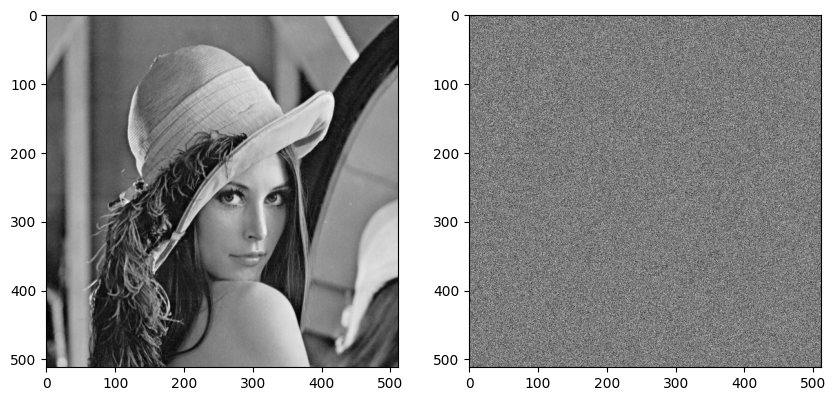

In [10]:
plt.figure(figsize=(10,5))
for i,img_pred in enumerate(unMixed):
    plt.subplot(1,2,i+1)
    img_pred = img_pred.reshape(img.shape)
    plt.imshow(img_pred, cmap='gray')

In [13]:
plt.imsave('denoised_lena.png',unMixed[0].reshape(img.shape),cmap='gray')

---